### Telco Churn Examination

### Goal: 
      Discover drivers of customer churn
      Use the drivers to develop a model classifying custmers who are
        most likely to churn

# Imports
    

First we'll start with importing the libraries that we need to perform 
our cleaning, prep, analysis other steps will proceed

In [1]:
import os
import subprocess    
import acquire as ac
import prepare as pr


import numpy as np
import pandas as pd
import numpy.ma as ma

import env
import scipy
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams

# ignore warnings
import warnings
warnings.filterwarnings("ignore")



# Data Dictionary
-Gender. Male or Female, codified as 0 and 1 respectively

-Senior Citizen. Whether or not a customer is 65 years old, 0 = No, 1 = Yes

-Partner. If a customer has a partner living with them, 0 = No, 1 = Yes

-Dependents. If a customer has dependents living with them, 0 = No, 1 = Yes

-Tenure. The length of time in months a customer has been with Telco

-Phone Service. If a customer has phone service, 0 = No, 1 = Yes

-Multiple Lines. If a customer has multiple phone lines, 0 = No, 1 = Yes

-Online Security. If a customer has paid Online Security service through Telco, 0 = No, 1 = Yes

-Online Backup. If a customer has paid Online Backup service through Telco, 0 = No, 1 = Yes

-Device Protection. If a customer has paid Device Protection service through Telco, 0 = No, 1 = Yes

-Tech Support. If a customer has paid Tech Support service through Telco, 0 = No, 1 = Yes

-Streaming TV. If a customer has Streaming TV service, 0 = No, 1 = Yes

-Streaming Movies. If a customer has Streaming Movie service, 0 = No, 1 = Yes

-Paperless Billing. If a customer has signed up for Paperless Billing, 0 = No, 1 = Yes

-Monthly Charges. The Monthly bill a customer receives in dollars

-Total Charges. The Total Charges in dollars a customer has paid while they have been a Telco customer

-Churn. Whether or not a customer is still with Telco

-Contract Type. Month-to-Month, One Year, Two Year contracts codified as 0, 1, 2 respectively

-Internet Service Type. No internet, FiberOptic, DSL, codified as 0, 1, 2 respectively

-Payment Type. Mailed check, Electronic Check, Bank Transfer (automatic), Credit Card (automatic) Codified as 0, 1, 2, 3 respectively



# Acquire

Acquire:
The data came from IBM initially, as a randomly generated dataset so that others could have a set to work on and learn form. Last information about the data set was provided on Thu July 11, 2019 08:15 AM. 

https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

I accessed the data via the codeup database and imported via seaborn's load dataset function



Here we load the dataset and set it to df so it can be referenced later

In [2]:
df = ac.new_telco_data() #Where it actually happens

Data was downloadeded from Codeup db, 25th Oct.

Size = 891 rows and 15 columns

Observations/rows represent the different customers at telco. 
Columns represent the different characteristics that were recorded at the original time of creation.

# Prepare 

-To prepare the data, we remove columns that are duplicated such as payment type id, internet service type is, conract type id, and customer id.

-We also remove any null values stored as white space

-Additionally the "total charges" column gets converetd to a float, and binary categories get changed to numeric values: gender, partners, dependents, phone service, and churn status.

-Multiple lines, online security, online backup, device protection, tech support, streaming tv, streaming movies, contact type, internet service type, payment type -> these are completed/filled out with dummy variables so there are no rows with blank cells

Now we should be able to call the function that makes all those changes 

In [3]:
df = pr.prep_telco_data(df) #starting fresh from the top down, this should work

### Once the data is acquired and prepared, we can split it into our 3 groups for classification, then into X/Y split where we pull the target variable, churn, into its own group.

In [4]:
train, validate, test = pr.split_telco_data(df)

In [5]:
x_train, y_train, x_validate, y_validate, x_test, y_test = pr.xysplit(train, validate, test)

# Explore / Questions:

In [6]:
train.describe()  #We can look at some basic information and categories

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.498095,0.161290,0.485141,0.302769,32.775210,0.905258,0.423927,0.292609,0.348743,0.349759,0.289307,0.386335,0.391415,0.590297,64.805131,2316.775641,0.265685,0.693167,1.122174,1.447295
std,0.500060,0.367845,0.499843,0.459514,24.709604,0.292896,0.494242,0.455018,0.476633,0.476954,0.453498,0.486971,0.488129,0.491841,30.294804,2284.984394,0.441753,0.836075,0.740151,1.074619
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.850000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.700000,396.100000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.250000,1414.800000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.300000,3893.600000,1.000000,1.000000,2.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.650000,8594.400000,1.000000,2.000000,2.000000,3.000000


### Do customers with more or less expensive bills maintain their accounts for longer periods of time?


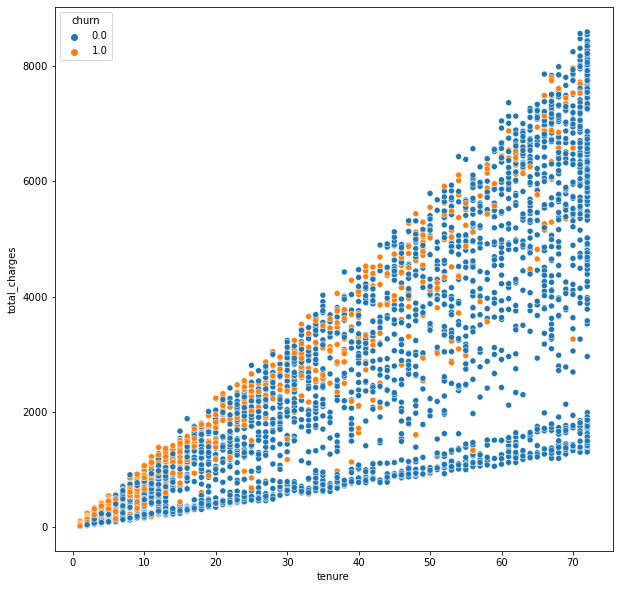

In [7]:
#For best figure size it may be necessary to run this block a few times
ac.getfirstplot(train)

### Above Figure: This plot shows that customers with higher total charges churn more often than those whose total charges accrue more slowly. The steeper the slope, the faster charges accrue. 

We can chi2 to test (Ho: Churn status is independent of charge accrual) and (Ha: Churn status is affected by charge accrual). 
We'll use CI of 95% and a = .05

In [8]:
ac.getchifirst(train)

chi^2 = 3723.2716
p     = 0.6053


The p value is greater than alpha and chi2 supports that Ha: Churn status is affected by charge accrual rate

### Does payment type have any kind of correlation to what services a customer has?


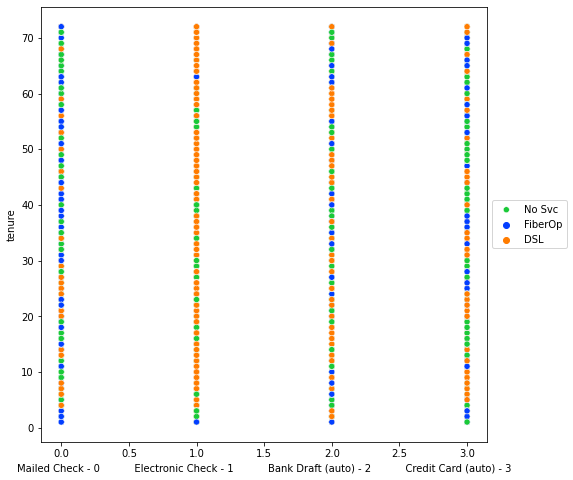

In [9]:
ac.getsecondplot(train)

### Above Figure: Payment type 1 is electronic check, they seem to be mostly DSL

We can chi2 to test (Ho: Service selection is independent of payment type) and (Ha: Service selection is affected by payment type). 
We'll use CI of 95% and a = .05

In [10]:
ac.getchisecond(train)

chi^2 = 733.2410
p     = 0.0000


The p value of 0 tells us that there is not likely any support for Ha, so we fail to reject Ho: Service selection is independent of payment type 

### What contract type has the most churn?


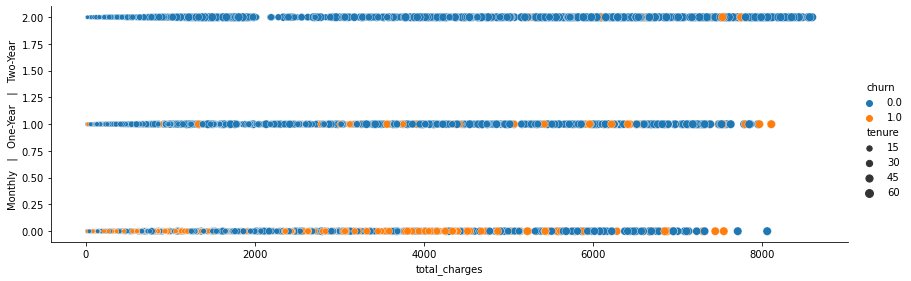

In [11]:
ac.getthirdplot(train)

### With the above graphic we see that the month to month contract type (value 0) seems to have the most churn.  
We can chi2 to see if churn status is affected by contract type, accepting a CI of 95% and alpha of .05. (Ho: contract type and churn status are unrelated) and (Ha: contract type and churn status are correlated)

In [12]:
ac.getchithird(train)

chi^2 = 664.6572
p     = 0.0000


With a p valus not exceeding alpha, we should fail to reject the null and accept that Ho: contract type and churn status are unrelated. 

### Does internet service type correlate to churn likelyhood?


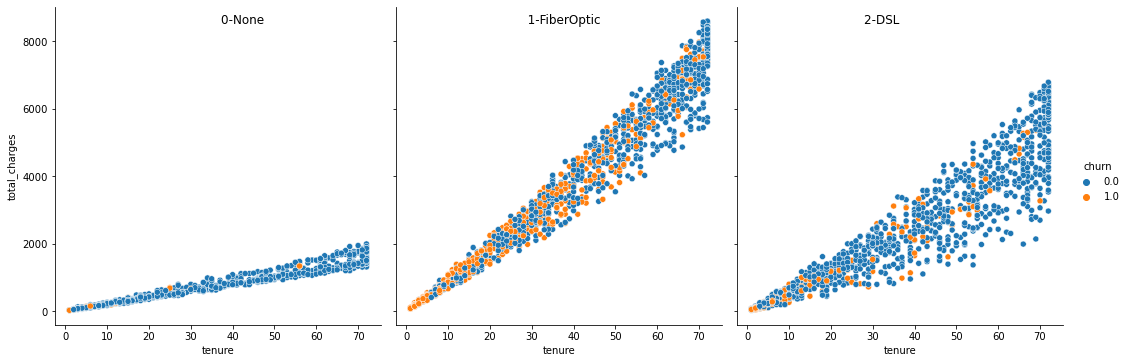

In [13]:
ac.getfourthplot(train)

### It seems like Fiber Optic (type 1) is the most likely to churn.

We can test Ho: Internet service type and and churn likelyhood are not related. & Ha: Internet service type and churn likelyhood are correlated. CI of 95% and alpha of .05

In [14]:
ac.getchifourth(train)

chi^2 = 664.6572
p     = 0.0000


With a p value less than alpha, we fail to reject null and accept that Ho: Internet service type and churn are not strongly correlated

### Does a customers monthly bill (not their total charges) affect churn?

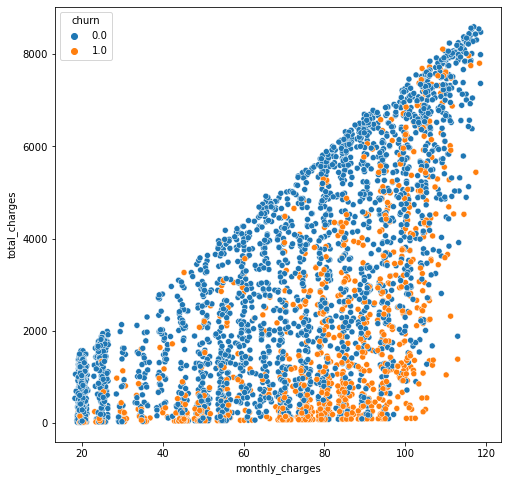

In [15]:
ac.getfifthplot(train)

## It seems like higher monthly charges have more churn

We can test Ho: Monthly charges and and churn likelyhood are not related. & Ha: Monthly charges and churn likelyhood are correlated. CI of 95% and alpha of .05

In [16]:
ac.getchififth(train)

chi^2 = 1582.9468
p     = 0.0000


We don't have a p value over 0.05 so we fail to reject the null and accept Ho: Monthly charges don't seem to be correlated to churn.


# Exploration summary:
It appears that the total bill over a customer's tenure has the highest likelyhood of being a driver for churn predictability. 

The other explored parameters did not return p values that would let us consider them significant, but the visualizations paint a picture of which areas could improve their customer retention percentages. Smaller chi2 values indicate a somewhat closer relationship between variables, but our values all being in the several hundreds, there isn't a strong indicator of correlation.  

# Modeling
We will move forward with the Total Charges vs Churn because it was the most statistically significant chi2 test, and the others returned 0.000.

#### Features Not being moved to modeling are:
Internet Service Type vs Churn, Contract Type vs Churn, and Payment Type vs Internet service type.

# Decision Tree

In [17]:
ac.get_tree(x_train, x_validate, y_train, y_validate)

Accuracy of Decision Tree on train data is 0.8074676149352299
Accuracy of Decision Tree on validate data is 0.7719194312796208


# Random Forest

In [18]:
ac.get_forest(x_train, x_validate, y_train, y_validate)

Accuracy of Random Forest on train is 0.8056896113792228
Accuracy of Random Forest on validate is 0.7825829383886256


# Logistic Regression

In [19]:
ac.get_reg(x_train, x_validate, y_train, y_validate)

Accuracy of Logistic Regression on train is 0.8036576073152146
Accuracy of Logistic Regression on validate is 0.794431279620853


# KNN

In [20]:
ac.get_knn(x_train, x_validate, y_train, y_validate)

Accuracy of KNN on train is 0.8308356616713234
Accuracy of KNN on validate is 0.7618483412322274


### Predictions
Our other models return at roughly 80% based on the train datasets. Our prediction function below returns a 79% on train and 77% on test from random forests, and 77% from KNN on test which is lower than the model, so we are beating baseline.

In [21]:
ac.getpredicts(x_train, y_train, x_validate, y_validate, x_test, y_test)

accuracy of random forest calssifier on training set0.79
[[2816   75]
 [ 753  293]]
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87      2891
         1.0       0.80      0.28      0.41      1046

    accuracy                           0.79      3937
   macro avg       0.79      0.63      0.64      3937
weighted avg       0.79      0.79      0.75      3937

Accuracy of random forest classifier on test set: 0.77
RMSE value for k=  5 is: 0.4791309355980372
Accuracy of KNN on test set: 0.7704335465529495


### Logistic Regression has our best result on validate, reaching almost 80 which I consider fantastic. 

In [22]:
ac.get_reg_test(x_train, x_validate, y_train, y_validate)

Accuracy of Logistic Regression on test is 0.794431279620853


Logistic Regression gives us a high result of almost 80 percent on validate and test. I think that's great. The other models did well on train, but lost points in validate. Log Reg gives us the best balance overall.

# Conclusions and Recommendations

## The strongest factor we find is that customers whose total bills are highest tend to churn more often. The other tests may not show a definitve correlation but the visualizations provide some actionable ideas.

My first recommendation would be to incentivize long time customers with higher bills by providing higher speeds, or additional features like online backups or tech support. gratis, as a thank you for their long term commitment. 

The other route would be to reach out to customers who don't seem to be fully utilizing the bandwidth or other services that they are paying a higher premium for, and suggest it could be discontinued for them, or paused if that option is available; the customer may want or need the service in the future. 

# Next steps
It would be interesting to expand the number of variables in the chi2 tests, it is tempting to do a large crosstab or relplot, but more detailed examination is the approach we took this time, and the granular approach provided actionable insight. 